In [1]:
import numpy as np
import random


In [8]:
def Estimateor(n, count):
    mu = 0
    sigma = 1
    sample_mean = [];
    MSE = 0.0

    for i in range(count):
        samples = [random.gauss(mu, sigma) for _ in range(n)]
        mean = np.mean(samples)
        sample_mean.append(mean)
        MSE += (mean - mu) ** 2

    return sample_mean, MSE / count
        

In [9]:
Estimateor(7, 500)

([-0.4359926493649322,
  0.33758167690056723,
  0.1502897921740983,
  -0.09780849079298537,
  0.04159944224714186,
  0.4709062611333801,
  -0.16239152802566312,
  0.3128924421870395,
  -0.15056272323898887,
  -0.11643777774688169,
  -0.23328388863323704,
  0.4438158265362357,
  0.04391675346867441,
  0.12235570174974535,
  -0.12021693603276797,
  0.10661624054498905,
  -0.05232896041547273,
  -0.008937230875069226,
  0.807194509022229,
  -0.5576531674614345,
  -0.027029002752098647,
  0.6364745034146837,
  -0.19279727024961119,
  -0.25161023006459277,
  -0.339814603904789,
  0.34949864660092766,
  0.12749454249204573,
  -0.09941898324694154,
  -0.4589981739684849,
  0.1140340922231313,
  -0.28186152244564483,
  0.12252272026755019,
  0.09944306751555827,
  -0.5390069791283167,
  0.23251631449598092,
  -0.5841975202237766,
  0.15554873580242348,
  0.2581887093868034,
  0.4019728200209668,
  -0.30176489192485517,
  0.13421140474042728,
  0.48223877666356924,
  0.8601284142678323,
  0.091

In [12]:
import util_plot, util_stat
import matplotlib.pyplot as plt

In [11]:
#8.2
sample_size = 10 # n
m_simulator = 1000 # m 
lambda_ = 2
expo = util_stat.ExponentialPdf(lam= lambda_)
means = []
Ls = []
for i in range(m_simulator):
    samples = [random.expovariate(lambd=lambda_) for _ in range(sample_size)]
    mean = np.mean(samples)
    L = 1/ mean
    means.append(mean)
    Ls.append(L) 



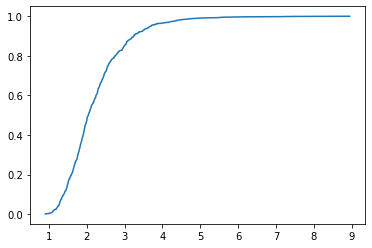

In [41]:
cdf = util_stat.Cdf(Ls)
plt.plot(cdf.xs, cdf.ps)

In [45]:
cdf.ConfidenceInterval(percentage=90)

(1.2748376559744574, 3.6990271440836615)

In [43]:
cdf.Percentile(5), cdf.Percentile(95)

(1.2748376559744574, 3.6990271440836615)

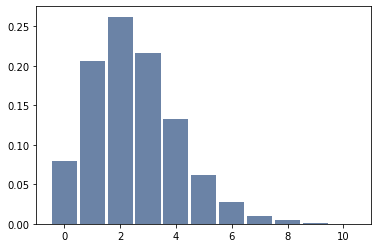

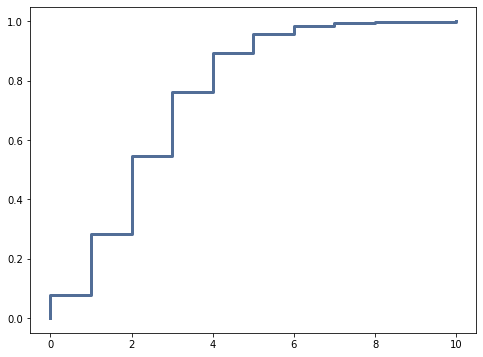

(0, 5)
(0, 5)


<Figure size 576x432 with 0 Axes>

In [40]:
#8.3
def simulate(lam):
    goals = 0
    time = 0
    while True:
        time_between_goal = random.expovariate(lam) # cause time ~ Expo(lam)
        time += time_between_goal
        if time > 1:
            break
        goals += 1
    
    return goals 

def Estimation(lam, nums):
    Ls = [simulate(lam) for _ in range(nums)]
    pmf = util_stat.Pmf(Ls)

    util_plot.Hist(pmf)
    util_plot.Show()

    cdf = util_stat.Cdf(Ls)

    util_plot.Cdf(cdf)
    util_plot.Show()

    print(pmf.CredibleInterval())
    print(cdf.ConfidenceInterval())
        
Estimation(2.5, 10000)